# Navigation Project

---

In this notebook, a solution for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) is provided.

### 1. Setup the Environment

At first some necessary packages need to be imported. This requires [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md), [NumPy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) to be installed.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt

# Set plotting options
%matplotlib inline
plt.style.use('ggplot')

Next, the Unity environment is to be started. Depending on the machine the appropriate Unity environment needs to be selected here.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

In [2]:
env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Set the first brain available as the default brain that will be controlled.

In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Reset the environment with the default brain and enable the training mode.

In [4]:
env_info = env.reset(train_mode=True)[brain_name]

Retrieve the state and action sizes.

In [5]:
state_size = len(env_info.vector_observations[0])
action_size = brain.vector_action_space_size

### 2. Create a DQN Agent

In this solution a DQN agent that implements experience replay will be trained to solve the banana environment. It it first initialized with the state and action sizes.

In [6]:
from dqn_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=0)

### 3. Define the Training Process

The training runs up to 1000 episodes. Once the mean score over the last 100 subsequent episodes hits or exceeds +13 points the environement is solved and the training process ends. The "exploration rate" epsilon decreases over time from 1.00 down to 0.01 with a decay factor of 0.98.

The q-network is a fully-connected neural network with two hidden layers of 64 nodes and relu activations.

In [7]:
from collections import deque

def dqn_training(n_episodes=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.98):
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    
    eps = eps_start                    # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score

        while True:
            action = agent.act(state, eps)                 # select an action
            
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            agent.step(state, action, reward, next_state, done)
            
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        
        scores_window.append(score)           # save most recent score
        scores.append(score)                  # save most recent score

        eps = max(eps_end, eps_decay*eps)     # decrease epsilon
        
        mean_scores = np.mean(scores_window)  # calculate mean of scores of last 100 episodes
        
        if i_episode % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores))
        
        if mean_scores>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, mean_scores))
            
            plt.plot(scores); plt.title("Scores");         # plot scores obtained per episode
            break

### 3. Train the DQN Agent

Start the training until an average score of 13.0 is achieved by the agent.

Episode 10	Average Score: 0.00
Episode 20	Average Score: 0.00
Episode 30	Average Score: 0.07
Episode 40	Average Score: 0.68
Episode 50	Average Score: 1.14
Episode 60	Average Score: 1.35
Episode 70	Average Score: 1.99
Episode 80	Average Score: 2.58
Episode 90	Average Score: 2.89
Episode 100	Average Score: 3.18
Episode 110	Average Score: 3.75
Episode 120	Average Score: 4.42
Episode 130	Average Score: 5.21
Episode 140	Average Score: 5.65
Episode 150	Average Score: 6.26
Episode 160	Average Score: 7.02
Episode 170	Average Score: 7.35
Episode 180	Average Score: 7.67
Episode 190	Average Score: 8.19
Episode 200	Average Score: 8.76
Episode 210	Average Score: 9.46
Episode 220	Average Score: 9.78
Episode 230	Average Score: 10.06
Episode 240	Average Score: 10.52
Episode 250	Average Score: 11.03
Episode 260	Average Score: 11.35
Episode 270	Average Score: 11.71
Episode 280	Average Score: 12.10
Episode 290	Average Score: 12.37
Episode 300	Average Score: 12.52
Episode 310	Average Score: 12.84

Environ

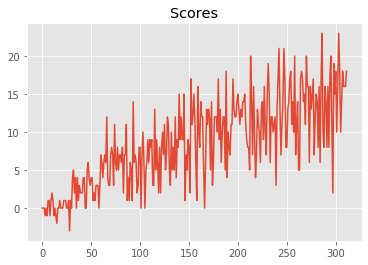

In [8]:
dqn_training()

### 4. Store Model and Clean Up

Save the trained model.

In [9]:
agent.store_model('stored_model.pth')

Close the environment.

In [10]:
env.close()